In [1]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# 1. Importing the data


In [2]:
data_df=pd.read_csv(r"D:\study\DataScience\greatLearning\archive\creditcard.csv")

In [3]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data_df.shape


(284807, 31)

In [5]:
data_df.sample(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241282,150963.0,2.130458,0.682574,-3.324150,0.649173,1.378417,-1.484688,0.809508,-0.458960,0.067498,...,-0.091409,-0.061782,-0.077941,0.299609,0.436743,0.698035,-0.082966,-0.016198,0.76,0
148905,90302.0,0.382361,0.318873,-1.438976,-2.156139,0.729144,-0.239307,0.367618,-2.107802,-0.387152,...,1.790701,0.384808,-0.451894,0.246432,0.767594,-0.114094,0.238818,0.253273,112.80,0
141771,84486.0,-1.474883,0.865894,1.397402,0.304247,0.314833,-0.731261,0.598756,-0.880422,-0.321342,...,0.645504,-0.308459,-0.028127,0.590945,-0.317209,-0.729312,0.472428,0.141974,84.88,0
62721,50403.0,0.911575,-0.214221,0.459648,1.159245,-0.432275,-0.157443,0.025029,0.006718,-0.155137,...,0.042178,-0.216908,-0.150882,-0.005826,0.381262,-0.492071,0.003718,0.043969,150.00,0
60196,49203.0,-0.688199,1.046064,1.137037,1.157169,0.462428,0.205796,0.422894,0.195379,0.056671,...,-0.116351,0.092977,-0.229672,-0.432950,-0.002562,-0.183629,0.548134,0.256469,1.00,0
211530,138454.0,2.103356,-1.039201,-0.854662,-0.969376,-0.613811,-0.075108,-0.855858,-0.143793,-0.107928,...,0.335330,0.978699,0.033201,0.320604,-0.020501,-0.101928,0.005506,-0.032742,69.00,0


We only goind to use the 3 main and columns present in the dataset
- Time
- Amount 
- Class(1=fraud and 0=not fraud)

In [6]:
data_df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [7]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data_df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [11]:
#Percentage check
null_cols=pd.DataFrame({'columns':data_df.isna().sum().index,'No. of Null Values':data_df.isnull().sum().values,"Percentage of NULL Values":data_df.isnull().sum().values/data_df.shape[0]})

In [12]:
null_cols

,columns,No. of Null Values,Percentage of NULL Values
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


Percentage of total not fraud transaction

In [13]:
nfcount=0
notFraud=data_df['Class']
for i in notFraud:
    if i ==0:
        nfcount+=1
percent_notFraud=(nfcount/len(notFraud))*100
print("The percentage of not fraud transaction : ",percent_notFraud)

The percentage of not fraud transaction :  99.82725143693798


Percentage of total fraud transaction

In [17]:
Fraud=data_df['Class']
percent_fraud=100-percent_notFraud
percent_fraud

0.17274856306201514

# Data visualization


In [19]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuiene Transaction']=notFraud
plot_data

,Fraud Transaction,Genuiene Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

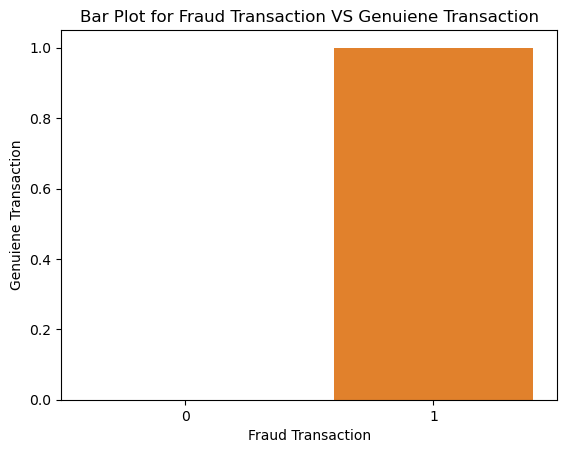

In [24]:
plt.title('Bar Plot for Fraud Transaction VS Genuiene Transaction')
sns.barplot(x=Fraud,y=notFraud)
plt.xlabel('Fraud Transaction')
plt.ylabel('Genuiene Transaction')
plt.show

As per the graph we can say that the Genuiene Transaction are way more than the Fraud Transaction

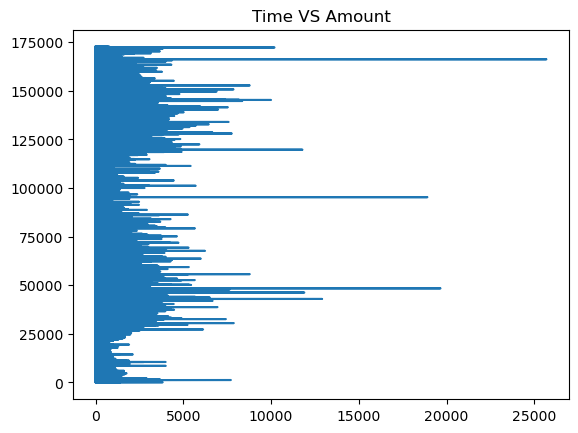

In [30]:
x=data_df['Amount']
y=data_df['Time']
plt.title('Time VS Amount')
plt.plot(x,y)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_253152\2987098073.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Amount'])


<Axes: title={'center': 'Amount Distribution'}, xlabel='Amount', ylabel='Density'>

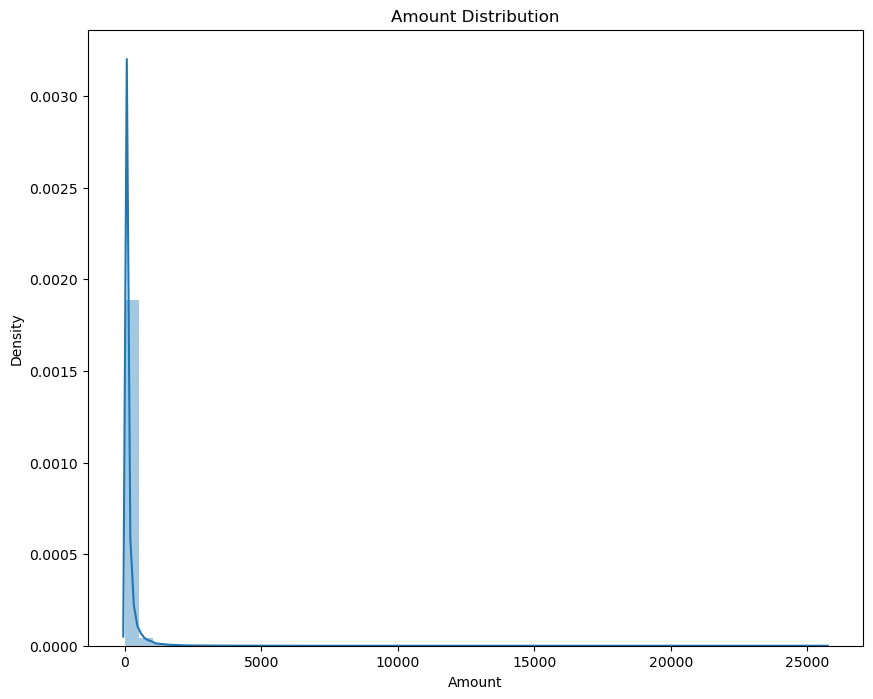

In [36]:
plt.figure(figsize=[10,8])
plt.title('Amount Distribution')
sns.distplot(data_df['Amount'])

From this amount distribution curve it is shown that the number of  high amount transactions are very low . So there is a high probability for huge transaction to be fraud. 

### Outliers

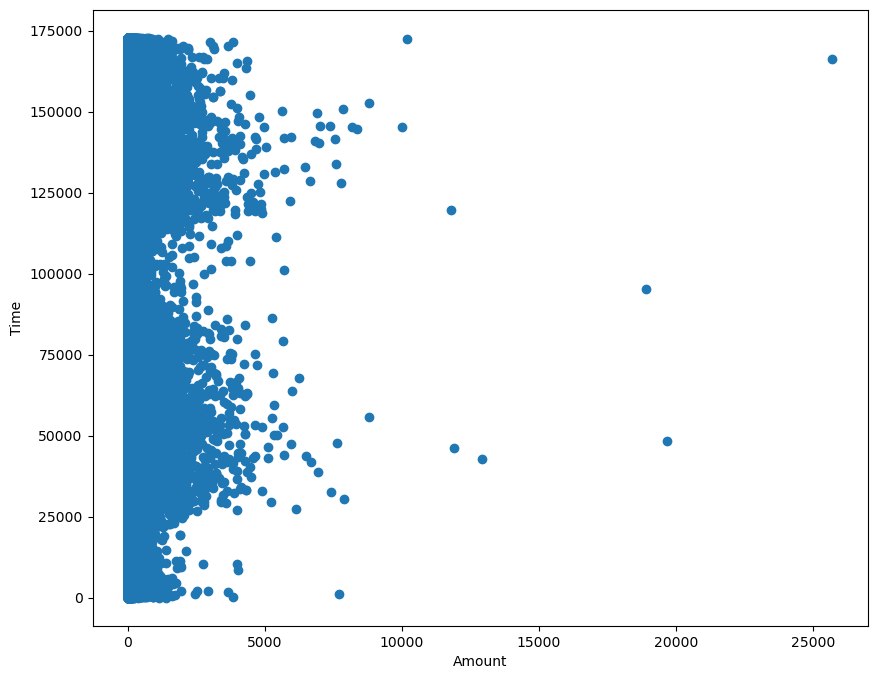

In [40]:
fig,ax=plt.subplots(figsize=(10,8))
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
ax.scatter(data_df['Amount'],data_df['Time'])


<Axes: >

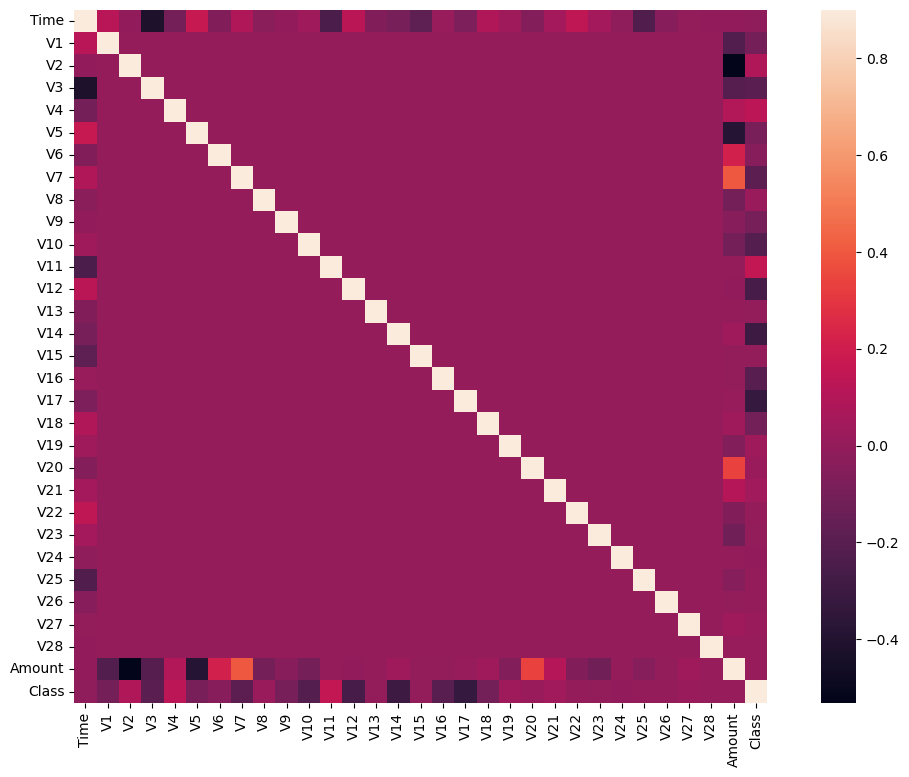

In [47]:
#correlation matrix
correlation_metrics=data_df.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True,vmax=0.9)

# Train Model

In [49]:
x=data_df.drop('Class',axis=1)
y=data_df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [51]:
logisticR=LogisticRegression()
logisticR.fit(x_train,y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred=logisticR.predict(x_test)

In [54]:
accuracy=logisticR.score(x_test,y_test)

In [55]:
cn=metrics.confusion_matrix(y_test,y_pred)
cn

array([[56837,    25],
       [   24,    76]], dtype=int64)

In [57]:
print("Accuracy of the model=: ",accuracy*100,"%")

Accuracy of the model=:  99.91397773954567 %


In [72]:
#ans=logisticR.predict(x.iloc[0]
logisticR.predict(x_test.iloc[0:1])

array([0], dtype=int64)